In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
messages = pd.read_csv(r'F:\DS\KAGGLE DATASET\NLP series\spam.csv', encoding = 'cp1252')

In [3]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
messages.shape

(5572, 5)

In [5]:
# ps / aim is to build a predictive model which can predict if the email is ham or spam

# lets do the data preparation

In [6]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
messages = messages.iloc[:,[0,1]]
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.rename(columns = { 'v1' : 'label' , 'v2' : 'message'}, inplace = True)

In [9]:
# messages   is name of DF
# message     is name of col in side of DF

In [10]:
messages.label = messages.label.replace({'ham':0, 'spam':1})

In [11]:
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
import nltk # natural langauge tool kit

In [13]:
from nltk.corpus import  stopwords

In [14]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
len(stopwords.words('english'))

179

In [17]:
# over here we have jus seen teh list of stop words but not removed it

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# now we will remove the punctuation and stopwords both

In [20]:
def text_process(mess):      # creating a function
    ''' 
    1. remove the punctuation  ##  a docstring
    2. remove the stopwords 
    3. return the list of clean textwords
    
    '''
    nopunc = [ char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [21]:
messages.message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [22]:
messages.message = messages.message.str.lower()
messages.message

# ppython is case sensitive to conver full doc either into lower case or
# upper case

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [23]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
#  it is used to get the count of each and every word

In [25]:
bow_transformer = CountVectorizer(analyzer= text_process).fit(messages['message'])                           

In [26]:
bow_transformer.vocabulary_

{'go': 3748,
 'jurong': 4644,
 'point': 6376,
 'crazy': 2463,
 'available': 1375,
 'bugis': 1840,
 'n': 5624,
 'great': 3845,
 'world': 9107,
 'la': 4803,
 'e': 2988,
 'buffet': 1838,
 'cine': 2178,
 'got': 3805,
 'amore': 1142,
 'wat': 8870,
 'ok': 5940,
 'lar': 4842,
 'joking': 4612,
 'wif': 9003,
 'u': 8534,
 'oni': 5972,
 'free': 3539,
 'entry': 3123,
 '2': 415,
 'wkly': 9059,
 'comp': 2294,
 'win': 9017,
 'fa': 3261,
 'cup': 2518,
 'final': 3385,
 'tkts': 8311,
 '21st': 435,
 'may': 5287,
 '2005': 422,
 'text': 8150,
 '87121': 838,
 'receive': 6774,
 'questionstd': 6665,
 'txt': 8518,
 'ratetcs': 6718,
 'apply': 1228,
 '08452810075over18s': 72,
 'dun': 2974,
 'say': 7129,
 'early': 2995,
 'hor': 4175,
 'c': 1889,
 'already': 1116,
 'nah': 5631,
 'dont': 2882,
 'think': 8224,
 'goes': 3762,
 'usf': 8664,
 'lives': 5004,
 'around': 1279,
 'though': 8243,
 'freemsg': 3547,
 'hey': 4071,
 'darling': 2582,
 '3': 520,
 'weeks': 8923,
 'word': 9093,
 'back': 1426,
 'id': 4294,
 'like': 4

In [27]:
len(bow_transformer.vocabulary_)

9431

In [28]:
# It means that the TDm will be having 9431 cols

In [29]:
messages_bow = bow_transformer.transform(messages.message)
# over there TDm is created
messages_bow.shape

(5572, 9431)

In [30]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [31]:
# after TDM we will do the sampling

In [32]:
from sklearn.model_selection import train_test_split

df_x_train,df_x_test, df_y_train,df_y_test = train_test_split(messages_bow, messages.label , test_size = 0.2 ,random_state = 123)                                                

In [33]:
print(df_x_train.shape)
print(df_y_train.shape)
print('**********************')
print(df_x_test.shape)
print(df_y_test.shape)


(4457, 9431)
(4457,)
**********************
(1115, 9431)
(1115,)


In [34]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(df_x_train, df_y_train)

MultinomialNB()

In [35]:
pred = nb.predict(df_x_test)

In [36]:
from sklearn.metrics import confusion_matrix

tab = confusion_matrix(df_y_test , pred)
tab

array([[971,  11],
       [  6, 127]], dtype=int64)

In [39]:
tab.diagonal().sum()/tab.sum()

0.9847533632286996

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(df_x_train , df_y_train)
pred_dt = dt.predict(df_x_test)
tab_dt = confusion_matrix(pred_dt,df_y_test)
tab_dt

array([[966,  27],
       [ 16, 106]], dtype=int64)

In [40]:
tab_dt.diagonal().sum()/tab_dt.sum()

0.9614349775784753

Hence NB gives best result on NLP / sentimental analysis

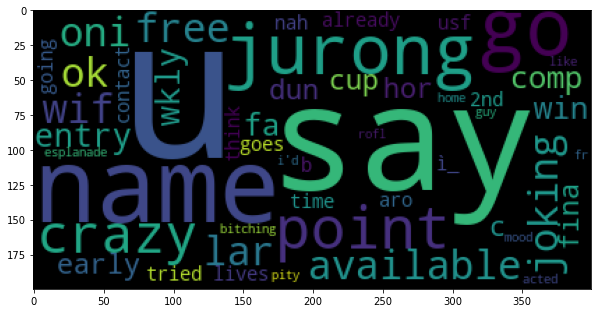

In [38]:
from wordcloud import WordCloud

cloud = WordCloud(stopwords = stopwords.words('english'),max_words = 50).generate(str(messages['message']))
plt.figure(figsize = (10,10) )
plt.imshow(cloud);

Build the separate word cloud on the spam and separate on ham and let me know your interpretation

In [43]:
ham_df = messages[messages.label==0]   # Ham
spam_df = messages[messages.label==1]  # Spam

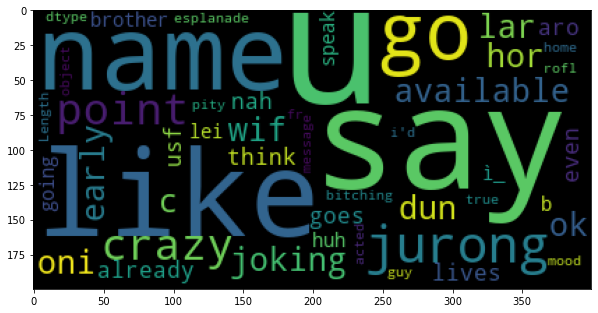

In [47]:
cloud = WordCloud(stopwords = stopwords.words('english'),max_words = 50).generate(str(ham_df['message']))
plt.figure(figsize = (10,10) )
plt.imshow(cloud);

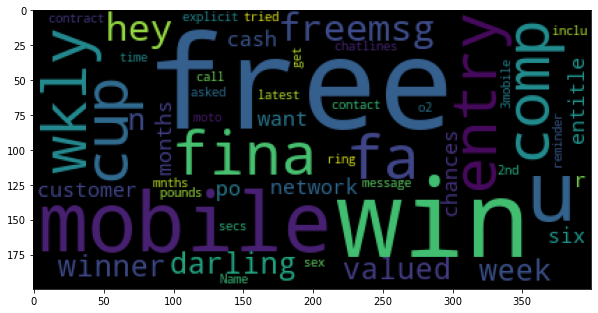

In [48]:
cloud = WordCloud(stopwords = stopwords.words('english'),max_words = 50).generate(str(spam_df['message']))
plt.figure(figsize = (10,10) )
plt.imshow(cloud);